In [1]:
import keras.backend as K
from data_manager import ClutteredMNIST
from visualizer import plot_mnist_sample
from visualizer import print_evaluation
from visualizer import plot_mnist_grid
from models import STN

Using TensorFlow backend.


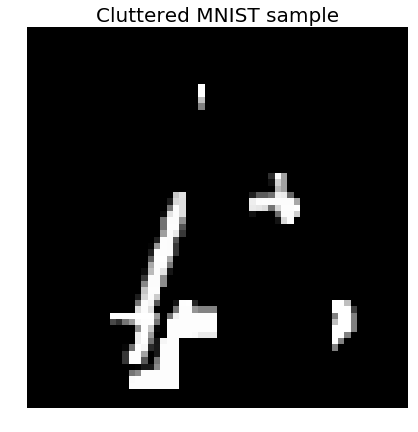

In [2]:
dataset_path = "../datasets/mnist_cluttered_60x60_6distortions.npz"
batch_size = 256
num_epochs = 30

data_manager = ClutteredMNIST(dataset_path)
train_data, val_data, test_data = data_manager.load()
x_train, y_train = train_data
plot_mnist_sample(x_train[7])

In [3]:
model = STN()
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 60, 60, 1)    0                                            
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 26, 26, 20)   520         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 13, 13, 20)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

10000/10000 [==============================] - 0s 49us/step
Epoch: 0 | Val: 0.17136050443053247 | Test: 0.17655548879206182


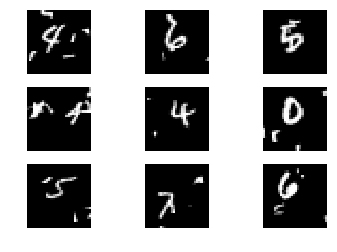

----------------------------------------
10000/10000 [==============================] - 1s 54us/step
Epoch: 10 | Val: 0.17013455713624134 | Test: 0.17813963381517678


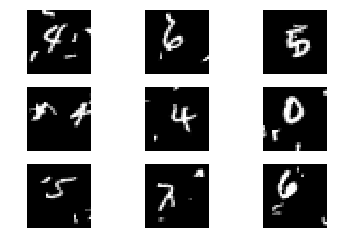

----------------------------------------
10000/10000 [==============================] - 1s 55us/step
Epoch: 20 | Val: 0.19145010298341514 | Test: 0.1978291994124651


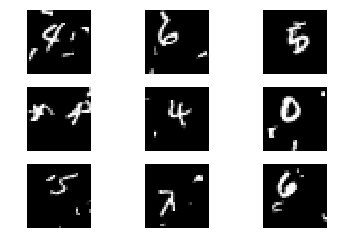

----------------------------------------


In [6]:
input_image = model.input
output_STN = model.get_layer('bilinear_interpolation_1').output
STN_function = K.function([input_image], [output_STN])

for epoch_arg in range(num_epochs):
    for batch_arg in range(150):
        arg_0 = batch_arg * batch_size
        arg_1 = (batch_arg + 1) * batch_size
        x_batch, y_batch = x_train[arg_0:arg_1], y_train[arg_0:arg_1]
        loss = model.train_on_batch(x_batch, y_batch)
    if epoch_arg % 10 == 0:
        val_score = model.evaluate(*val_data, verbose=1)
        test_score = model.evaluate(*test_data, verbose=1)
        print_evaluation(epoch_arg, val_score, test_score)
        plot_mnist_grid(x_batch, STN_function)
        print('-' * 40)

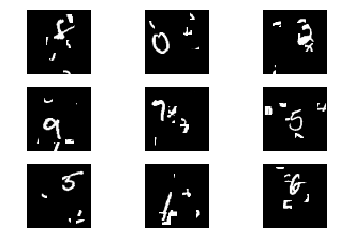

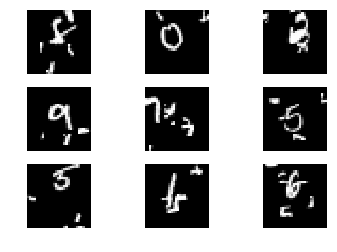

In [7]:
plot_mnist_grid(x_train)
plot_mnist_grid(x_train, STN_function)